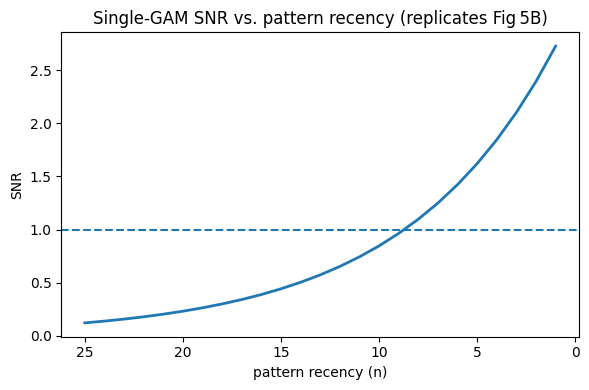

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GAM import *
def snr_single_gam(n, N=1000, f=0.5, p=0.122, q=0.122):
    """
    Analytic Signal‑to‑Noise Ratio (SNR) for a single‑GAM as a function of pattern
    recency (Eq. 14, Sorek et al. 2013).

    Parameters
    ----------
    n : array‑like or int
        Pattern recency (1 = most recent CS).
    N : int, default 1000
        Number of pseudo‑synapses.
    f : float, default 0.5
        Sparseness of the CS patterns.
    p, q : floats, default 0.122
        Low→high and high→low transition probabilities per learning episode.

    Returns
    -------
    snr : ndarray
        SNR value(s) corresponding to n.
    """
    n = np.asarray(n)
    v = 1.0 - (f * p + (1.0 - f) * q)          # “forgetting” factor
    snr0 = np.sqrt(N * p * q / 2.0)            # prefactor in Eq. 14
    return snr0 * v ** (n - 1)


# ---- reproduce Figure 5B ----------------------------------------------------
n_axis = np.arange(1, 26)                      # up to 25 previous patterns
snr_vals = snr_single_gam(n_axis)

plt.figure(figsize=(6, 4))
plt.plot(n_axis, snr_vals, lw=2)
plt.axhline(1.0, ls='--')                      # retrieval threshold
plt.gca().invert_xaxis()                       # newest patterns on the left
plt.xlabel("pattern recency (n)")
plt.ylabel("SNR")
plt.title("Single‑GAM SNR vs. pattern recency (replicates Fig 5B)")
plt.tight_layout()
plt.show()


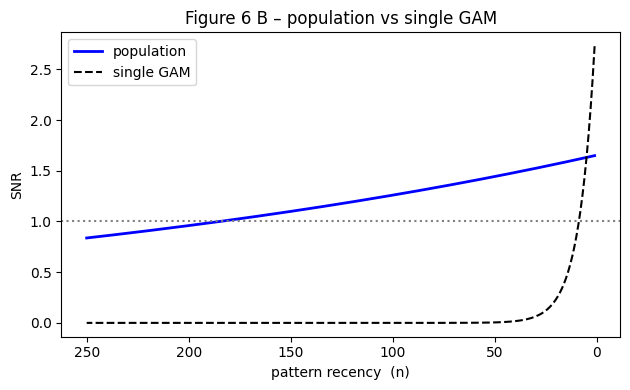

In [5]:
import numpy as np, matplotlib.pyplot as plt

# ---------- helpers ----------
def snr_single(n, N=1000, f=0.5, p=0.122, q=0.122):
    v  = 1 - (f*p + (1-f)*q)
    s0 = np.sqrt(N*p*q/2)                # Eq.14 prefactor
    return s0 * v**(n-1)

def snr_population(n, N=1000, f=0.5, p=np.e / 1000, q=np.e / 1000):
    # Note: p = q = e/N is used in Fig. 6 caption, but not similar to the single-GAM
    v = 1 - (f*p + (1-f)*q)
    return np.sqrt(N*(1-v)) * v**(n-1)   # Eq.30  (Z → ∞)

# ---------- recreate Fig 6 B ----------
n_axis = np.arange(1, 251)               # pattern recency, newest on left
snr_single_curve = snr_single(n_axis)    # p = q = 0.122
snr_pop_curve    = snr_population(n_axis)

plt.figure(figsize=(6.4, 4))
plt.plot(n_axis, snr_pop_curve,    'b',  lw=2, label='population')
plt.plot(n_axis, snr_single_curve, '--k',lw=1.5,label='single GAM')
plt.axhline(1, ls=':', color='grey')     # retrieval threshold
plt.gca().invert_xaxis()
plt.xlabel('pattern recency  (n)')
plt.ylabel('SNR')
plt.title('Figure 6 B – population vs single GAM')
plt.legend(); plt.tight_layout(); plt.show()


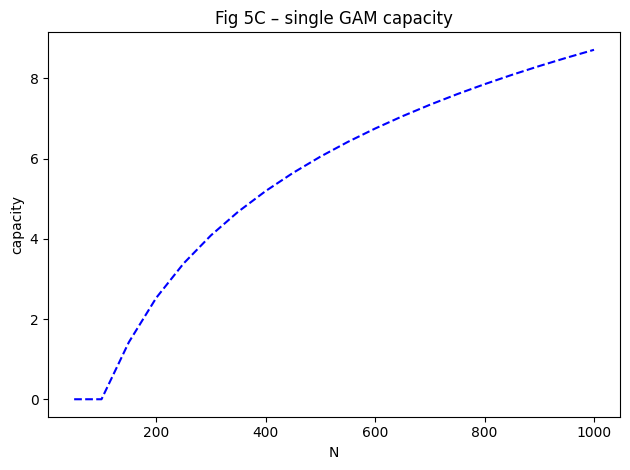

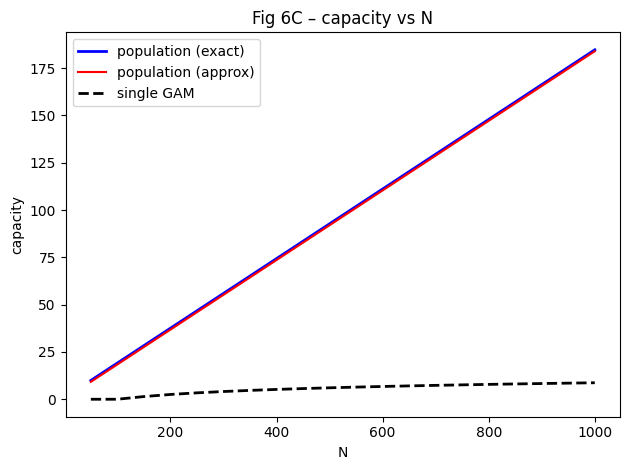

In [6]:
import numpy as np

# ---------- Fig 5C – single-module capacity ----------
def capacity_single_gam(N, f=0.5, p=0.122, q=0.122):
    """
    Expected number of CS patterns a *single* GAM can store
    (threshold SNR ≥ 1; Eq. 14 → solve for n).

    Parameters
    ----------
    N : array-like
        Synapse counts (can be scalar).
    f, p, q : floats
        Same parameters as the paper (defaults match Fig 5).

    Returns
    -------
    cap : ndarray
        Capacity as float; round/ceil for an integer if you wish.
    """
    N = np.asarray(N, dtype=float)
    v   = 1 - (f*p + (1-f)*q)                # forgetting factor
    lnV = np.log(v)
    cap = 1 + (-0.5 * np.log(N*p*q/2) / lnV) # algebra from Eq. 14
    cap[cap < 0] = 0
    return cap


# ---------- Fig 6C – large-colony capacity ----------
def capacity_population_exact(N, f=0.5):
    """
    Infinite-colony (Z→∞) capacity using the exact Markov formula (Eq. 30)
    with the optimal p=q=e/N (caption to Fig 6).

    Returns
    -------
    cap_exact : ndarray
    """
    N = np.asarray(N, dtype=float)
    p = q = np.e / N
    v   = 1 - (f*p + (1-f)*q)                # v = 1 − e/N  (f = 0.5)
    lnV = np.log(v)
    cap = 1 + (-0.5 * np.log(N*(1-v)) / lnV)
    return cap


def capacity_population_approx(N):
    """
    Analytical large-N approximation (Eq. 20):
        cap ≈ N / (2e)
    """
    return np.asarray(N, dtype=float) / (2*np.e)


N_axis = np.arange(50, 1001, 50)

# Fig 5C
plt.figure()
plt.plot(N_axis, capacity_single_gam(N_axis), 'b--')
plt.title('Fig 5C – single GAM capacity')
plt.xlabel('N'); plt.ylabel('capacity'); plt.tight_layout()

# Fig 6C
cap_single = capacity_single_gam(N_axis)
cap_pop_ex = capacity_population_exact(N_axis)
cap_pop_ap = capacity_population_approx(N_axis)

plt.figure()
plt.plot(N_axis, cap_pop_ex,  'b', lw=2, label='population (exact)')
plt.plot(N_axis, cap_pop_ap, 'r', lw=1.5, label='population (approx)')
plt.plot(N_axis, cap_single, 'k--', lw=2, label='single GAM')
plt.title('Fig 6C – capacity vs N')
plt.xlabel('N'); plt.ylabel('capacity'); plt.legend(); plt.tight_layout()
plt.show()

